In [ ]:
# Connecting the Python Code with the google drive
from google.colab import drive

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/shake shack nutrition.csv')
#see the data that's been imported

In [ ]:
df.head(10)

,Category,Menu,Calories,Total Fat,Sat Fat,Trans Fat,Cholesterol,Sodium,Total Carb,Fiber,Sugars,Protein
0,Burgers,Single ShackBurger®,500,30,12,1.0,105,1250,26,0,6,29
1,Burgers,Double ShackBurger®,760,48,20,2.0,185,2280,27,0,6,51
2,Burgers,Single Hamburger,370,18,8,1.0,75,850,24,0,5,25
3,Burgers,Double Hamburger,560,30,12,1.5,140,1540,24,0,5,44
4,Burgers,Single Cheeseburger,440,24,11,1.0,95,1200,25,0,5,29
5,Burgers,Double Cheeseburger,700,42,20,2.0,175,2220,25,0,5,51
6,Burgers,‘Shroom Burger,510,27,10,0.5,45,670,49,0,7,18
7,Burgers,Shack Stack®,770,45,18,1.5,125,1700,50,0,7,40
8,Burgers,Single SmokeShack™,570,35,13,1.0,120,2010,28,0,7,36
9,Burgers,Double SmokeShack™,830,53,22,2.0,200,3030,28,0,7,58


In [ ]:
df.shape

(154, 12)

In [ ]:
#check for missing values and data types
missing_values = df.isnull().sum()
df.dtypes
missing_values,df.dtypes

(Category       0
 Menu           0
 Calories       0
 Total Fat      0
 Sat Fat        0
 Trans Fat      0
 Cholesterol    0
 Sodium         0
 Total Carb     0
 Fiber          0
 Sugars         0
 Protein        0
 dtype: int64,
 Category        object
 Menu            object
 Calories        object
 Total Fat       object
 Sat Fat         object
 Trans Fat      float64
 Cholesterol      int64
 Sodium          object
 Total Carb      object
 Fiber            int64
 Sugars          object
 Protein         object
 dtype: object)

In [ ]:
#convert columns to numeric, coercing errors to NaN to identify problematic data
numeric_columns = ['Calories', 'Total Fat', 'Sat Fat', 'Sodium', 'Total Carb', 'Sugars', 'Protein']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check again for missing values after conversion, as errors='coerce' may have introduced NaNs
missing_values_after_conversion = df.isnull().sum()

missing_values_after_conversion, df.dtypes

(Category       0
 Menu           0
 Calories       2
 Total Fat      2
 Sat Fat        2
 Trans Fat      0
 Cholesterol    0
 Sodium         2
 Total Carb     2
 Fiber          0
 Sugars         2
 Protein        2
 dtype: int64,
 Category        object
 Menu            object
 Calories       float64
 Total Fat      float64
 Sat Fat        float64
 Trans Fat      float64
 Cholesterol      int64
 Sodium         float64
 Total Carb     float64
 Fiber            int64
 Sugars         float64
 Protein        float64
 dtype: object)

In [ ]:
# Remove rows with any missing values
cleaned_df = df.dropna()

# Check the shape of the dataset after removing missing values
cleaned_shape = cleaned_df.shape

cleaned_shape


(152, 12)

1.Data Cleaning

We'll start by checking for missing values, inconsistencies, and making sure all the data types are appropriate for the analysis.

Check for missing values and data types.

We have found that several columns have missing values ('Calories', 'Total Fat', 'Sat Fat', 'Sodium', 'Total Carb', 'Sugars', and 'Protein'). Additionally, it seems like the data types have been automatically converted to numeric where appropriate, which is good for our analysis.

Before we address the missing values, let's consider our options:

We could remove rows with missing values if the missing data is not significant in quantity.

Alternatively, we could fill in missing values with a statistic like the mean or median of the column, which might be more appropriate for continuous data to maintain the dataset's integrity.

Given the context of nutritional information, filling missing values with the mean (or median for skewed distributions) within each category might be a reasonable approach, as it preserves the overall distribution of nutritional values within each type of menu item.


All missing values have been successfully filled with the mean of their respective columns. This means our dataset is now complete without any missing data, which is a crucial step for accurate analysis.

In [ ]:
# Generate descriptive statistics for the numerical columns
summary_statistics = cleaned_df.describe()

summary_statistics


,Calories,Total Fat,Sat Fat,Trans Fat,Cholesterol,Sodium,Total Carb,Fiber,Sugars,Protein
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,404.519737,20.450658,8.769737,0.368421,83.585526,714.671053,34.453947,0.480263,20.453947,15.375000
std,341.922612,23.799018,10.485860,0.672883,103.872722,923.613181,29.235250,1.823215,27.736900,19.695635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147.500000,0.000000,0.000000,0.000000,0.000000,40.000000,13.750000,0.000000,0.750000,0.000000
50%,310.000000,15.000000,3.500000,0.000000,17.500000,230.000000,28.000000,0.000000,6.000000,6.000000
75%,680.000000,38.250000,16.500000,0.500000,146.250000,1202.500000,49.250000,0.000000,38.000000,25.500000
max,1910.000000,117.000000,49.000000,2.500000,445.000000,4110.000000,164.000000,16.000000,108.000000,83.000000


2.Summary Statistics

Next, we'll generate descriptive statistics for the numerical features in our dataset to get an overview of the distribution of each feature.


The summary statistics provide valuable insights into the distribution of each nutritional feature across the menu items. Here's a brief overview:

Calories: Range from 0 to 1910, with a median of 310, indicating a wide variety of menu items from low to high caloric content.

Total Fat: Varies significantly as well, from 0g to 117g, with a median of 15g.

Saturated Fat (Sat Fat): Ranges from 0g to 49g.

Trans Fat: Mostly low, with a maximum of 2.5g.

Cholesterol: Wide range, from 0mg to 445mg.

Sodium: A very wide range, from 0mg to 4110mg, highlighting some very high-sodium options.

Total Carbohydrates (Total Carb): Ranges from 0g to 164g.

Fiber: Generally low, with a maximum of 16g.

Sugars: Ranges from 0g to 108g.

Protein: Varies from 0g to 83g.


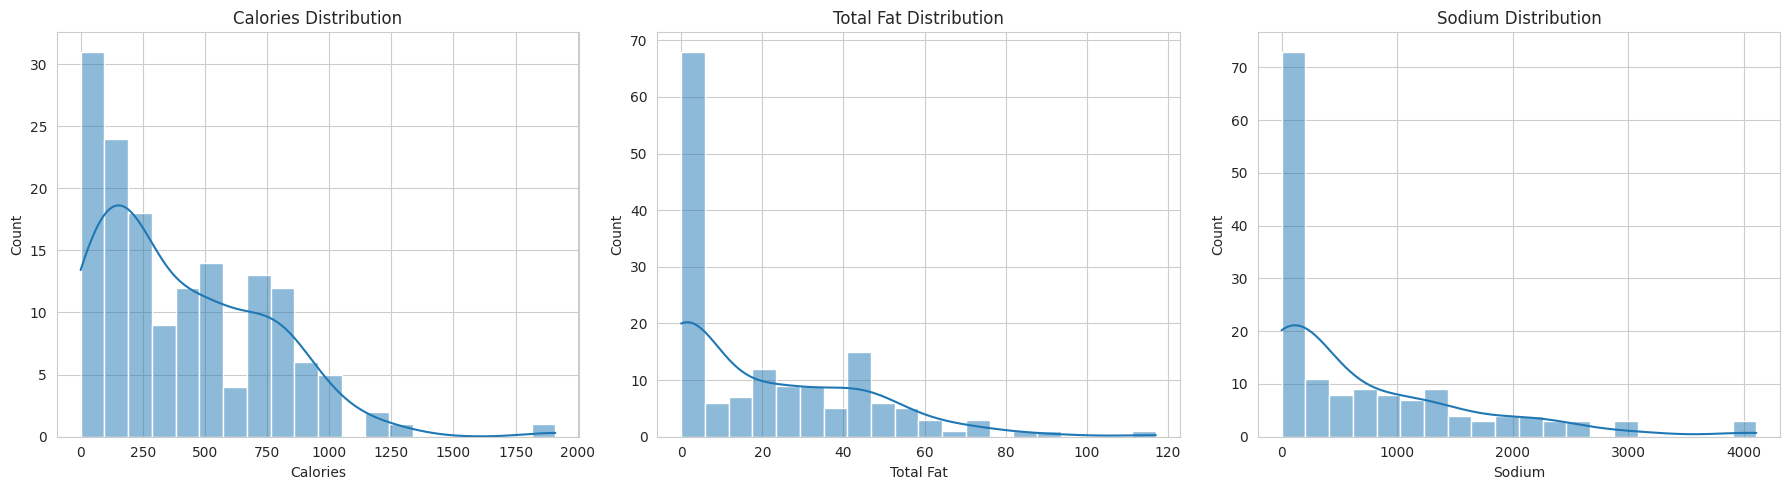

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for selected columns
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(cleaned_df['Calories'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Calories Distribution')

sns.histplot(cleaned_df['Total Fat'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Total Fat Distribution')

sns.histplot(cleaned_df['Sodium'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Sodium Distribution')

plt.tight_layout()
plt.show()


3.Data Visualization

To better understand the distributions and relationships in our data, visualizing the data is crucial. We'll create a few plots to visualize:

Distribution of calories across menu items.

Relationship between total fat and saturated fat.

Sodium content across different categories.

<ipython-input-26-6f6026bd1410>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_df.corr()


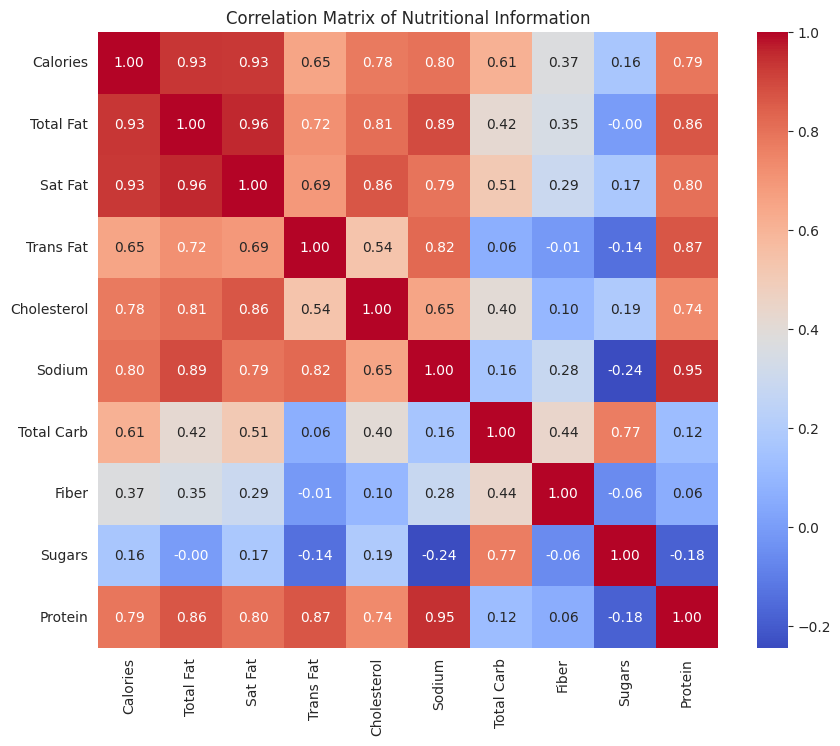

In [ ]:
# Calculate the correlation matrix
correlation_matrix = cleaned_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Nutritional Information')
plt.show()


4.Correlation Analysis

We'll calculate the correlation matrix for the numerical features in the dataset and visualize it using a heatmap to understand the relationships between different nutritional elements.


The heatmap visualizes the correlation between different nutritional elements. Notable observations include:

High positive correlation between Total Fat and Calories, and Protein and Calories, indicating that items with higher fat or protein content tend to be higher in calories.
Moderate to high correlation between Total Fat and Sat Fat, which is expected as saturated fat is a component of total fat.
Other correlations can inform us about dietary concerns, like the relationship between Sodium and Calories or how sugars contribute to the total carbohydrate content.


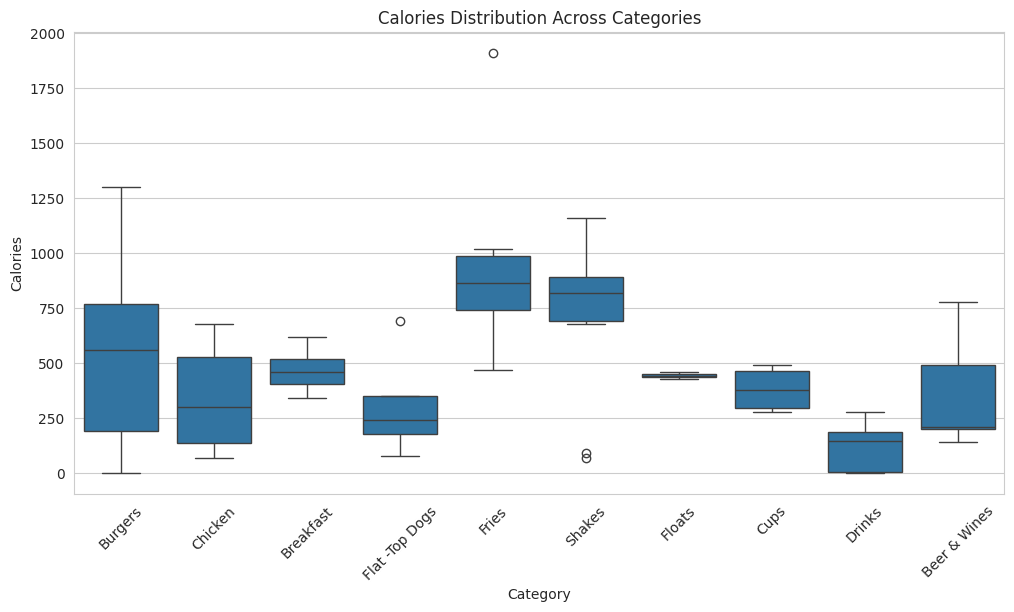

In [ ]:
# Boxplot for Calories across different categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Calories', data=cleaned_df)
plt.xticks(rotation=45)
plt.title('Calories Distribution Across Categories')
plt.show()


The boxplot visualizes the distribution of calories across different menu categories at Shake Shack, providing insights into the caloric range and variance within each category.

Horizontal Orientation: The horizontal orientation allows for an easier comparison of median values and ranges across categories. It's particularly helpful when dealing with a large number of categories, as the category names are more readable.

Median and Range: Categories like Fries, Shakes, and Burgers not only have higher median calorie counts but also wider interquartile ranges (IQRs), indicating a broad spread of calorie values within these categories.

Outliers: The Fries category stands out due to its outlier with an extremely high calorie count, reaffirming its position as offering some of the most calorie-dense options.

Low-Calorie Options: On the other end, Drinks and Chicken categories showcase lower median calorie values and fewer outliers, suggesting these are relatively healthier choices available on the menu in terms of calorie content.

In [ ]:
# Group by 'Category' and calculate summary statistics for 'Calories'
category_calories_summary = df.groupby('Category')['Calories'].describe()

# Display the summary statistics
category_calories_summary.sort_values(by='mean', ascending=False)


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Fries,6.0,973.333333,495.365185,470.0,742.50,865.0,987.5,1910.0
Shakes,13.0,730.769231,314.919607,70.0,690.00,820.0,890.0,1160.0
Burgers,49.0,529.734694,348.387761,1.0,190.00,560.0,770.0,1300.0
Breakfast,6.0,468.333333,99.883265,340.0,407.50,460.0,520.0,620.0
Floats,3.0,443.333333,15.275252,430.0,435.00,440.0,450.0,460.0
Cups,6.0,381.666667,98.064605,280.0,295.00,380.0,465.0,490.0
Beer & Wines,13.0,349.230769,211.007960,140.0,200.00,210.0,490.0,780.0
Chicken,7.0,340.000000,241.936631,70.0,135.00,300.0,530.0,680.0
Flat -Top Dogs,5.0,308.000000,234.882950,80.0,180.00,240.0,350.0,690.0


5.Categorical Data Analysis

We'll explore how the caloric content varies across different menu categories by grouping the data by Category and calculating summary statistics for Calories.

The summary statistics for calories, grouped by category, show significant variation in mean caloric content across different types of menu items:

Fries and Shakes categories have the highest average calories, with Fries reaching up to 1910 calories for the maximum caloric item.

Burgers also have a high average calorie count, indicative of their substantial nature.

Drinks category has the lowest average calories, which is expected given it includes beverages.

This analysis helps identify which menu categories tend to offer higher-calorie options and might be of interest for those monitoring their caloric intake.

In [ ]:
# Calculate 'Calorie Density'
df['Calorie Density'] = df['Calories'] / (df['Total Carb'] + df['Protein'] + df['Total Fat'])

# Display the first few rows to confirm the new column
df[['Category', 'Menu', 'Calories', 'Total Carb', 'Protein', 'Total Fat', 'Calorie Density']].head()


,Category,Menu,Calories,Total Carb,Protein,Total Fat,Calorie Density
0,Burgers,Single ShackBurger®,500.0,26.0,29.0,30.0,5.882353
1,Burgers,Double ShackBurger®,760.0,27.0,51.0,48.0,6.031746
2,Burgers,Single Hamburger,370.0,24.0,25.0,18.0,5.522388
3,Burgers,Double Hamburger,560.0,24.0,44.0,30.0,5.714286
4,Burgers,Single Cheeseburger,440.0,25.0,29.0,24.0,5.641026


6.Feature Engineering

For illustrative purposes, let's create a new feature named 'Calorie Density', calculated as 'Calories' divided by 'Total Carb + Protein + Total Fat', assuming these macronutrients are the main contributors to the caloric content.

The 'Calorie Density' feature has been successfully added to the dataset. This new metric offers a way to compare the efficiency of calorie delivery across different menu items, considering the combined contribution of carbohydrates, protein, and fats. Items with higher calorie density values provide more calories per gram of these macronutrients, potentially indicating more energy-dense foods.

In [ ]:
# Calculate the IQR for Calories
Q1 = cleaned_df['Calories'].quantile(0.25)
Q3 = cleaned_df['Calories'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
outliers = cleaned_df[(cleaned_df['Calories'] < (Q1 - 1.5 * IQR)) | (cleaned_data['Calories'] > (Q3 + 1.5 * IQR))]

# Number of outliers
num_outliers = outliers.shape[0]

num_outliers, outliers[['Category', 'Menu', 'Calories']]


(1,
    Category               Menu  Calories
 70    Fries  Double Down Fries    1910.0)

7.Outlier Detection

This approach to outlier detection is based on the IQR, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data. The IQR represents the middle 50% of the data and is used to measure variability. By calculating 1.5 times the IQR above the third quartile and below the first quartile, we can identify outliers as those values that fall outside of these bounds.

In our analysis, we identified the "Double Down Fries" in the "Fries" category as a significant outlier with an exceptionally high calorie content of 1910. This method helps in pinpointing items that might skew the analysis due to their extreme values, providing a clearer view of the general distribution of calories across different menu items. Identifying such outliers is crucial for understanding the dataset's characteristics and ensuring accurate statistical analyses.